In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn import tree
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv("CleanedEV.csv") 

In [5]:
df.head()

,Unnamed: 0,HFUEL,HHFAMINC,HOMEOWN,HHSIZE,YOUNGCHILD,HHVEHCNT,URBRUR,HTPPOPDN,PRICE,PLACE,R_AGE_IMP,R_SEX_IMP,EDUC,R_RACE,GT1JBLWK,OCCAT,CARSHARE,TIMETOWK,YEARMILE,VEHAGE
0,3,0,5,1.0,2.0,0.0,2.0,0,4,2.0,3.0,55,1,5.0,1.0,0,4.0,0,10.0,12000.0,3.0
1,75,0,3,1.0,1.0,0.0,1.0,1,2,3.0,1.0,28,1,5.0,1.0,0,4.0,0,35.0,400.0,2.0
2,76,0,3,1.0,1.0,0.0,1.0,0,2,4.0,4.0,24,1,4.0,1.0,0,2.0,0,10.0,2600.0,3.0
3,145,1,2,0.0,2.0,0.0,0.0,1,6,3.0,2.0,45,0,2.0,1.0,0,3.0,0,5.0,10000.0,2.0
4,197,0,5,1.0,1.0,0.0,1.0,0,5,2.0,4.0,36,1,2.0,1.0,0,4.0,0,40.0,9000.0,3.0


In [6]:
dataX = df.drop(columns=['HFUEL'])
dataY = df[['HFUEL']]

In [7]:
modelClf = DecisionTreeClassifier().fit(dataX, dataY)
for i,j in enumerate(dataX):
  score_f = modelClf.feature_importances_
  print(j, '= ', score_f[i])

Unnamed: 0 =  0.31848705834543134
HHFAMINC =  0.009480928654158767
HOMEOWN =  0.00785161587854956
HHSIZE =  0.02871790101511687
YOUNGCHILD =  0.01448968357342949
HHVEHCNT =  0.04351402778798871
URBRUR =  0.0029893948384322453
HTPPOPDN =  0.038604077463386836
PRICE =  0.03677494640800685
PLACE =  0.04666231813993112
R_AGE_IMP =  0.11094816597140232
R_SEX_IMP =  0.010115578739235628
EDUC =  0.034145600304464264
R_RACE =  0.023170722030614443
GT1JBLWK =  0.008347421049751716
OCCAT =  0.026498811406108755
CARSHARE =  0.0005599053389291059
TIMETOWK =  0.08295918115412092
YEARMILE =  0.10769408881505531
VEHAGE =  0.04798857308588583


[Text(177.483446682224, 213.0912, 'X[0] <= 122344.0\ngini = 0.048\nsamples = 6221\nvalue = [6069, 152]'),
 Text(135.10577830762986, 204.3936, 'X[0] <= 809.5\ngini = 0.047\nsamples = 6219\nvalue = [6068, 151]'),
 Text(54.52457142857143, 195.696, 'X[0] <= 786.5\ngini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(53.133194805194805, 186.9984, 'X[9] <= 4.5\ngini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(51.74181818181818, 178.3008, 'X[5] <= 0.5\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(50.35044155844156, 169.60320000000002, 'X[10] <= 39.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(48.95906493506494, 160.9056, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(51.74181818181818, 160.9056, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53.133194805194805, 169.60320000000002, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(54.52457142857143, 178.3008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(55.91594805194805, 186.9984, 'gini = 0.0\nsamples = 2\nvalue

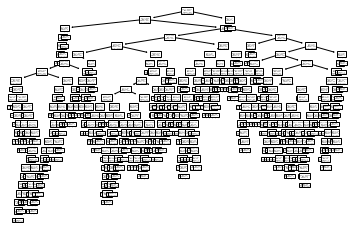

In [8]:
tree.plot_tree(modelClf) 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2)

In [10]:
res_pred = modelClf.predict(X_test)
score = accuracy_score(y_test, res_pred)
score
print(classification_report(y_test, res_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1220
           1       1.00      1.00      1.00        25

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245



In [11]:
confusion_matrix(res_pred , y_test) 

array([[1220,    0],
       [   0,   25]])